# Redes Neurais

Na aula de hoje, vamos explorar os seguintes tópicos em Python:

- TensorFlow e Keras
- MLP
- Treinando uma Rede Neural
- MNIST
- Exercícios

##   

## Exercício

__1)__ Refaça o exercício exemplo da aula para fixar conceitos!

__2)__ O exercicio será montar uma Rede Neural de uma importante base de dados, muito conhecida também, chamada de __Fashion MNIST__, onde queremos classificar roupas em algumas categorias. Está base de dados contém 70,000 imagens em tons de cinza em 10 categorias. As imagens mostram artigos individuais de roupas com baixa resolução (28 por 28 pixels), como vemos aqui:

<img src="https://tensorflow.org/images/fashion-mnist-sprite.png" width="600">

In [1]:
# TensorFlow e tf.keras
import tensorflow
import keras

# Bibliotecas Auxiliares
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
#Baixando a nossa base de dados

fashion_mnist = keras.datasets.fashion_mnist

(train_images, train_labels), (test_images, test_labels) = fashion_mnist.load_data()

Carregamos 4 arrays NumPy divididos em treino e teste, e além disso as imagens são arrays NumPy de 28x28, com os valores de pixels entre 0 to 255. As labels (alvo da classificação) são um array de inteiros, no intervalo de 0 a 9. Esse corresponde com a classe de roupa que cada imagem representa:

<table>
  <tr>
    <th>Label</th>
    <th>Classe</th>
  </tr>
  <tr>
    <td>0</td>
    <td>Camisetas/Top (T-shirt/top)</td>
  </tr>
  <tr>
    <td>1</td>
    <td>Calça (Trouser)</td>
  </tr>
    <tr>
    <td>2</td>
    <td>Suéter (Pullover)</td>
  </tr>
    <tr>
    <td>3</td>
    <td>Vestidos (Dress)</td>
  </tr>
    <tr>
    <td>4</td>
    <td>Casaco (Coat)</td>
  </tr>
    <tr>
    <td>5</td>
    <td>Sandálias (Sandal)</td>
  </tr>
    <tr>
    <td>6</td>
    <td>Camisas (Shirt)</td>
  </tr>
    <tr>
    <td>7</td>
    <td>Tênis (Sneaker)</td>
  </tr>
    <tr>
    <td>8</td>
    <td>Bolsa (Bag)</td>
  </tr>
    <tr>
    <td>9</td>
    <td>Botas (Ankle boot)</td>
  </tr>
</table>


In [3]:
class_names = ['T-shirt/top', 
               'Trouser', 
               'Pullover', 
               'Dress', 
               'Coat',
               'Sandal', 
               'Shirt', 
               'Sneaker', 
               'Bag', 
               'Ankle boot']

In [4]:
train_images.shape

(60000, 28, 28)

In [5]:
len(train_labels)

60000

In [6]:
train_labels

array([9, 0, 0, ..., 3, 0, 5], dtype=uint8)

In [7]:
test_images.shape

(10000, 28, 28)

In [8]:
len(test_labels)

10000

## Pré-Processamento dos Dados

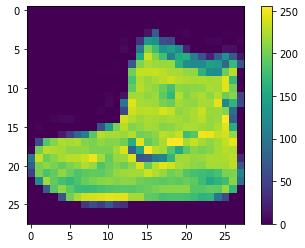

In [9]:
plt.figure()
plt.imshow(train_images[0])
plt.colorbar()
plt.grid(False)
plt.show()

In [10]:
# Reshape

#Faça o reshape da train_images dividindo por 255. e salvando na mesma variavel
train_images = train_images / 255.0

#Faça o reshape da test_images dividindo por 255. e salvando na mesma variavel
test_images = test_images / 255.0

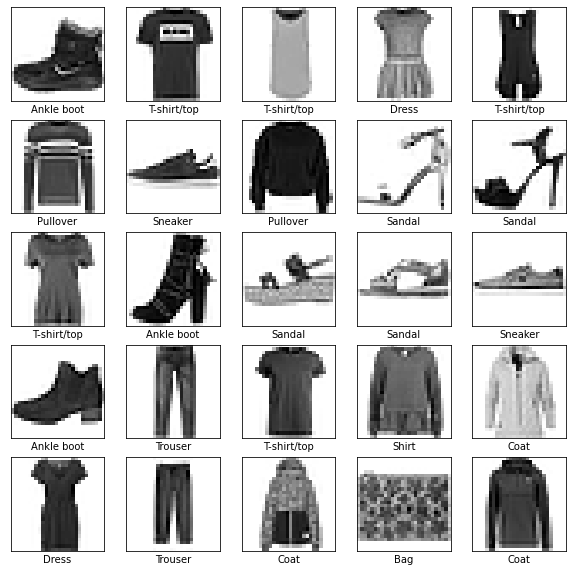

In [11]:
# alguns plots da base de teste

plt.figure(figsize=(10,10))
for i in range(25):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(train_images[i], cmap=plt.cm.binary)
    plt.xlabel(class_names[train_labels[i]])
plt.show()

In [12]:
model = keras.Sequential([
    keras.layers.Flatten(input_shape=(28, 28)),
    keras.layers.Dense(128, activation='relu'),
    keras.layers.Dense(10, activation='softmax')
])

In [13]:
# Crie um compile() com os seguintes parametros:
# optimizer = 'adam'
# loss = 'sparse_categorical_crossentropy'
# metrics=['accuracy']

model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

# Crie o summary() para o modelo
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten (Flatten)            (None, 784)               0         
_________________________________________________________________
dense (Dense)                (None, 128)               100480    
_________________________________________________________________
dense_1 (Dense)              (None, 10)                1290      
Total params: 101,770
Trainable params: 101,770
Non-trainable params: 0
_________________________________________________________________


In [14]:
# Faça o fit do modelo passando train_images, train_labels e epochs = 10
model.fit(train_images, train_labels, epochs=10)

Epoch 1/10
1875/1875 [==============================] - 1s 625us/step - loss: 0.5006 - accuracy: 0.8234
Epoch 2/10
1875/1875 [==============================] - 1s 610us/step - loss: 0.3730 - accuracy: 0.8653
Epoch 3/10
1875/1875 [==============================] - 1s 610us/step - loss: 0.3359 - accuracy: 0.8773
Epoch 4/10
1875/1875 [==============================] - 1s 616us/step - loss: 0.3104 - accuracy: 0.8863
Epoch 5/10
1875/1875 [==============================] - 1s 614us/step - loss: 0.2929 - accuracy: 0.8925
Epoch 6/10
1875/1875 [==============================] - 1s 616us/step - loss: 0.2791 - accuracy: 0.8958
Epoch 7/10
1875/1875 [==============================] - 1s 620us/step - loss: 0.2660 - accuracy: 0.9011
Epoch 8/10
1875/1875 [==============================] - 1s 616us/step - loss: 0.2569 - accuracy: 0.9047
Epoch 9/10
1875/1875 [==============================] - 1s 619us/step - loss: 0.2477 - accuracy: 0.9092
Epoch 10/10
1875/1875 [==============================] - 1s 625u

In [15]:
# crie o pred_labels usando a função predict_classes para o test_images
pred_labels = model.predict_classes(test_images)

Instructions for updating:
Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).


In [16]:
from mlxtend.plotting import plot_confusion_matrix
from sklearn.metrics import classification_report

# Faça o print do classification_report para pred_labels e test_labels
print(classification_report(pred_labels, test_labels))

              precision    recall  f1-score   support

           0       0.91      0.78      0.84      1161
           1       0.98      0.99      0.98       992
           2       0.81      0.80      0.81      1009
           3       0.92      0.86      0.89      1064
           4       0.82      0.80      0.81      1027
           5       0.95      0.98      0.97       970
           6       0.59      0.80      0.68       743
           7       0.97      0.92      0.94      1051
           8       0.97      0.97      0.97      1002
           9       0.95      0.96      0.96       981

    accuracy                           0.89     10000
   macro avg       0.89      0.89      0.88     10000
weighted avg       0.89      0.89      0.89     10000



Matriz de confusão do modelo nos dados de teste:



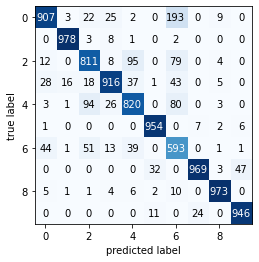

In [17]:
from mlxtend.plotting import plot_confusion_matrix
from sklearn.metrics import classification_report, confusion_matrix

# Crie a matriz de confusão para o pred_labels e test_labels
cm = confusion_matrix(pred_labels, test_labels)

print("Matriz de confusão do modelo nos dados de teste:\n")
plot_confusion_matrix(conf_mat=cm)
plt.show()

Vamos ver como que ficou as respostas de acordo com a imagem:

In [18]:
# Trazendo a probabilidade de cada classe
predictions = model.predict(test_images)

In [19]:
# Função para plotar as imagens

def plot_image(i, predictions_array, true_label, img):
  predictions_array, true_label, img = predictions_array[i], true_label[i], img[i]
  plt.grid(False)
  plt.xticks([])
  plt.yticks([])

  plt.imshow(img, cmap=plt.cm.binary)

  predicted_label = np.argmax(predictions_array)
  if predicted_label == true_label:
    color = 'blue'
  else:
    color = 'red'

  plt.xlabel("{} {:2.0f}% ({})".format(class_names[predicted_label],
                                100*np.max(predictions_array),
                                class_names[true_label]),
                                color=color)

# Cria o gráfico com as probabilidades

def plot_value_array(i, predictions_array, true_label):
  predictions_array, true_label = predictions_array[i], true_label[i]
  plt.grid(False)
  plt.xticks([])
  plt.yticks([])
  thisplot = plt.bar(range(10), predictions_array, color="#777777")
  plt.ylim([0, 1])
  predicted_label = np.argmax(predictions_array)

  thisplot[predicted_label].set_color('red')
  thisplot[true_label].set_color('blue')

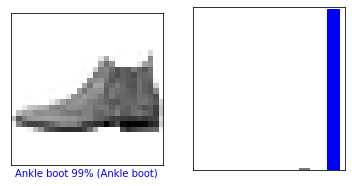

In [20]:
# Teste com o id = 1

i = 0
plt.figure(figsize=(6,3))
plt.subplot(1,2,1)
plot_image(i, predictions, test_labels, test_images)
plt.subplot(1,2,2)
plot_value_array(i, predictions,  test_labels)
plt.show()

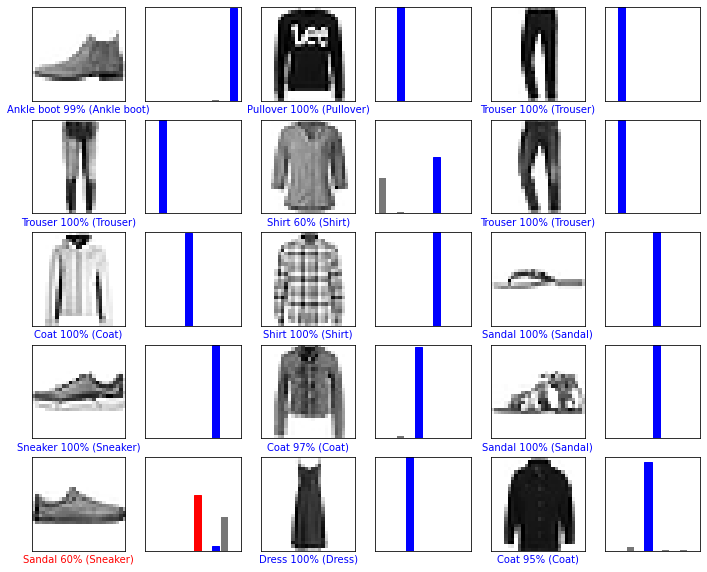

In [21]:
# Plota o primeiro X test images, e as labels preditas, e as labels verdadeiras.
# Colore as predições corretas de azul e as incorretas de vermelho.

num_rows = 5
num_cols = 3
num_images = num_rows*num_cols
plt.figure(figsize=(2*2*num_cols, 2*num_rows))
for i in range(num_images):
  plt.subplot(num_rows, 2*num_cols, 2*i+1)
  plot_image(i, predictions, test_labels, test_images)
  plt.subplot(num_rows, 2*num_cols, 2*i+2)
  plot_value_array(i, predictions, test_labels)
plt.show()

##   